# Аналитическое решение

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

def Analytycal (x, t):
    return m.cos(2*t - x)

check1 = [Analytycal(0.1*i, 1) for i in range(0, 11)]
check1

[-0.4161468365471424,
 -0.32328956686350335,
 -0.2272020946930871,
 -0.12884449429552464,
 -0.029199522301288815,
 0.0707372016677029,
 0.16996714290024104,
 0.26749882862458757,
 0.3623577544766736,
 0.4535961214255773,
 0.5403023058681398]

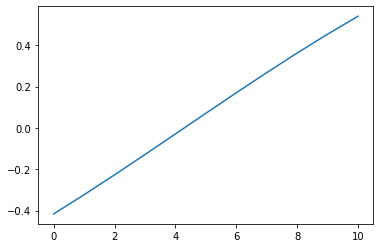

In [2]:
plt.plot(check1)

# Вычисления для спектральной устойчивости


In [3]:
from numpy.polynomial import Polynomial as P

A = P([1, -33, 4, -4/3])
B = P([0, 48, -10, 12])
C = P([0, -27, 8, -4])
D = P([0, 6, -2, 4/3])

c0 = A*A + B*B + C*C + D*D
c0

Polynomial([ 1.00000000e+00, -6.60000000e+01,  4.16600000e+03, -1.68266667e+03,
        1.65600000e+03, -3.20000000e+02,  1.63555556e+02], domain=[-1.,  1.], window=[-1.,  1.])

In [4]:
c1 = A*B + B*C + C*D
c1

Polynomial([    0.        ,    48.        , -3052.        ,  1290.        ,
       -1172.        ,   216.        ,   -69.33333333], domain=[-1.,  1.], window=[-1.,  1.])

In [5]:
c2 = A*C + B*D
c2

Polynomial([   0.        ,  -27.        , 1187.        , -532.        ,
        356.        ,  -64.        ,   21.33333333], domain=[-1.,  1.], window=[-1.,  1.])

In [6]:
c3 = A*D
c3

Polynomial([   0.        ,    6.        , -200.        ,   91.33333333,
        -60.        ,    8.        ,   -1.77777778], domain=[-1.,  1.], window=[-1.,  1.])

In [7]:
#c0 + c1*cos + c2*cos2 + c3*cos3

# Численное решение

In [32]:

K = 0.5 #число Куранта
L = 41
N = int(round(L/K))
t = 1/N
h = 1/L

U = np.matrix(np.zeros((N+1, L+1)))

def col_1 (n):
    return m.cos(2*n*t)
def col_2 (n):
    return m.cos(2*n*t) + m.sin(2*n*t)*h - m.cos(2*n*t)*h*h/2 - m.sin(2*n*t)*h**3/6
def col_3 (n):
    return m.cos(2*n*t) + m.sin(2*n*t)*2*h - m.cos(2*n*t)*h*h*2 - m.sin(2*n*t)*h**3*4/3

def row_1 (l):
    return m.cos(l*h)

for i in range(0, N+1) :
    U[i, 0] = col_1(i)
    U[i, 1] = col_2(i)
    U[i, 2] = col_3(i)
    
    
for i in range(0, L+1) :
    U[0, i] = row_1(i)
    

In [33]:
for n in range(0, N) :
    for l in range(3, L+1) :
        U[n+1, l] = (U[n, l] + t/(3*h)*(2*U[n, l-3] - 9*U[n, l-2] + 18*U[n, l-1] - 11*U[n, l]) 
                          + 2*t**2/h**2*(-U[n, l-3] + 4*U[n, l-2] - 5*U[n, l-1] + 2*U[n, l])
                      - 4*t**3/(3*h**3)*(-U[n, l-3] + 3*U[n, l-2] - 3*U[n, l-1] + U[n, l]))
        
check2 = U.getA()[N][::int(L/10)]

for i in range(0, 11):
    print(check2[i])

-0.4161468365471424
-0.3255965665130075
-0.23194978529649113
-0.13609702320157585
-0.03894989719765452
0.058567665572672185
0.15552821489208946
0.2510095980736082
0.3441037301829306
0.4339252304680894
0.5196198428587682


# Расхождение численного и аналитического решений

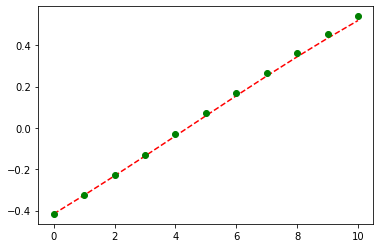

In [34]:
plt.plot(check2, 'r--', check1, 'go')

In [35]:
diff = [ abs(check1[i] - check2[i]) for i in range(0, 11) ]
print(diff)
print('Максимальное расхождение:',max(diff))


[0.0, 0.002306999649504149, 0.00474769060340402, 0.007252528906051214, 0.009750374896365707, 0.012169536095030721, 0.01443892800815158, 0.016489230550979395, 0.01825402429374301, 0.01967089095748792, 0.0206824630093716]
Максимальное расхождение: 0.0206824630093716
